#Descriptive Analysis on Cleaned Food Data.csv

package importing

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

food count by Country/Region

In [13]:
df_food = pd.read_csv('cleaned_food_data.csv')

country_counts = df_food['Country/Region'].value_counts()

print("\n\nFood Counts by Country/Region\n\n")
print(country_counts.to_markdown(numalign="center", stralign="center"))



Food Counts by Country/Region


|  Country/Region  |  count  |
|:----------------:|:-------:|
|      India       |   14    |
|      Japan       |    9    |
|  United States   |    7    |
|      China       |    5    |
|      Mexico      |    5    |
|      Korea       |    4    |
|      Italy       |    4    |
|   Philippines    |    4    |
|      France      |    4    |
|     Vietnam      |    3    |
|    Argentina     |    3    |
|   Middle East    |    3    |
|     Malaysia     |    3    |
|      Turkey      |    3    |
|    Caribbean     |    2    |
|     Colombia     |    2    |
|      Spain       |    2    |
|    Indonesia     |    2    |
|     Georgia      |    2    |
|       Peru       |    2    |
|     Lebanon      |    1    |
|     Thailand     |    1    |
|      Canada      |    1    |
|      Greece      |    1    |
|      Egypt       |    1    |
|      Poland      |    1    |
|     Jamaica      |    1    |
|    Australia     |    1    |
|      Taiwan      |    1    |
|   N

#Grouped Analysis

average calories and preparation time by Country/Region

In [14]:
grouped_stats = df_food.groupby('Country/Region')[['Calories', 'Preparation Time']].mean()

print("\n\nAverage Calories and Preparation Time by Country/Region\n\n")
print(grouped_stats.to_markdown(numalign="center", stralign="center"))



Average Calories and Preparation Time by Country/Region


|  Country/Region  |  Calories  |  Preparation Time  |
|:----------------:|:----------:|:------------------:|
|    Argentina     |    450     |      31.6667       |
|    Australia     |    600     |         45         |
|     Belgium      |    500     |         25         |
|      Canada      |    700     |         25         |
|    Caribbean     |    350     |        37.5        |
|      China       |    550     |         40         |
|     Colombia     |    350     |        27.5        |
|      Egypt       |    550     |         60         |
|      France      |    500     |       28.75        |
|     Georgia      |    500     |         40         |
|     Germany      |    600     |         20         |
|      Greece      |    450     |         30         |
|      India       |    375     |      51.0714       |
|    Indonesia     |    475     |         35         |
|      Italy       |   487.5    |       31.25        |
|    

cross tabulation

In [15]:
crosstab_category = pd.crosstab(df_food['Country/Region'], df_food['Category'])

print("\n\nFood Category Distribution by Country/Region\n\n")
print(crosstab_category.to_markdown(numalign="center", stralign="center"))



Food Category Distribution by Country/Region


|  Country/Region  |  Dessert  |  Drink  |  Main Course  |  Side Dish  |  Snack  |
|:----------------:|:---------:|:-------:|:-------------:|:-----------:|:-------:|
|    Argentina     |     0     |    0    |       2       |      0      |    1    |
|    Australia     |     0     |    0    |       1       |      0      |    0    |
|     Belgium      |     0     |    0    |       0       |      0      |    1    |
|      Canada      |     0     |    0    |       1       |      0      |    0    |
|    Caribbean     |     1     |    0    |       0       |      0      |    1    |
|      China       |     0     |    0    |       4       |      0      |    1    |
|     Colombia     |     1     |    0    |       1       |      0      |    0    |
|      Egypt       |     0     |    0    |       1       |      0      |    0    |
|      France      |     2     |    0    |       2       |      0      |    0    |
|     Georgia      |     0     |    0 

#Visualization of the Food Count by 'Country/Region'

/tmp/ipython-input-419338151.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = country_counts_sorted.index, y = country_counts_sorted.values, palette = "viridis")


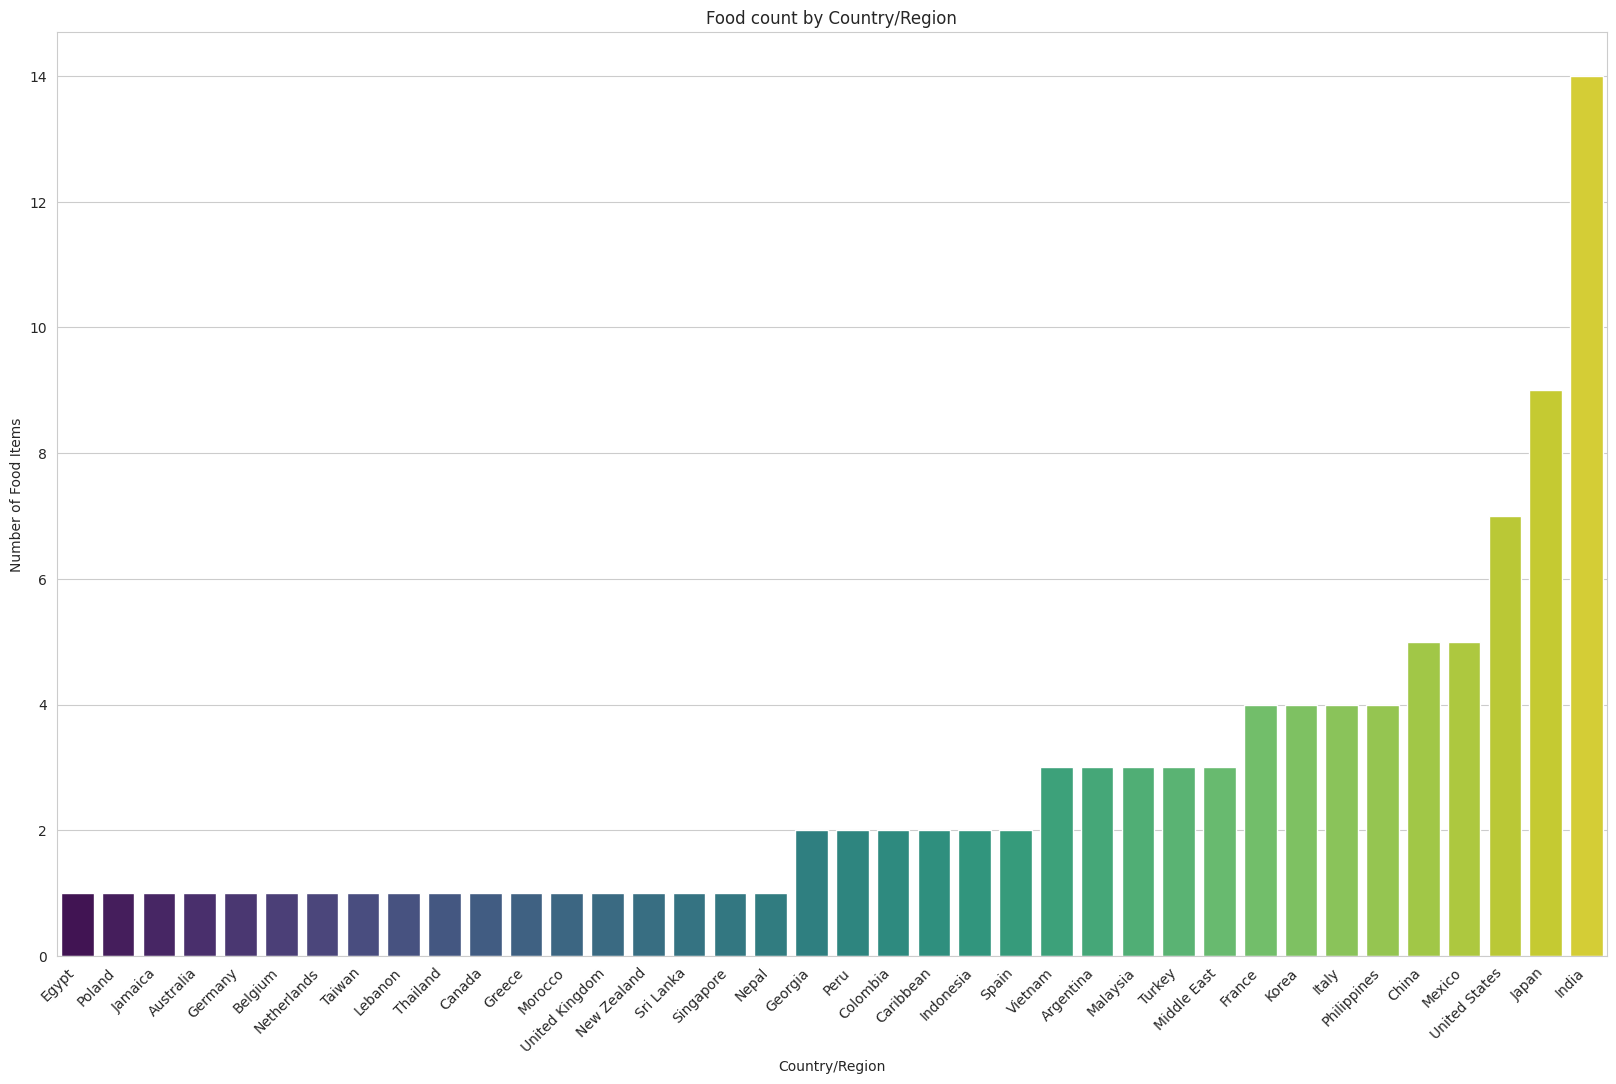

In [16]:
# starting the country values (increasing order)

country_counts_sorted = country_counts.sort_values(ascending=True)

# set figure size and style

plt.figure(figsize=(20, 12))
sns.set_style("whitegrid")

# create barplot

sns.barplot(x = country_counts_sorted.index, y = country_counts_sorted.values, palette = "viridis")

# rotate x-axis value for better readability

plt.xticks(rotation = 45, ha = 'right')

# set labels and title

plt.xlabel('Country/Region')
plt.ylabel('Number of Food Items')
plt.title('Food count by Country/Region')

# show the plt

plt.show()

average calories by Country/Region

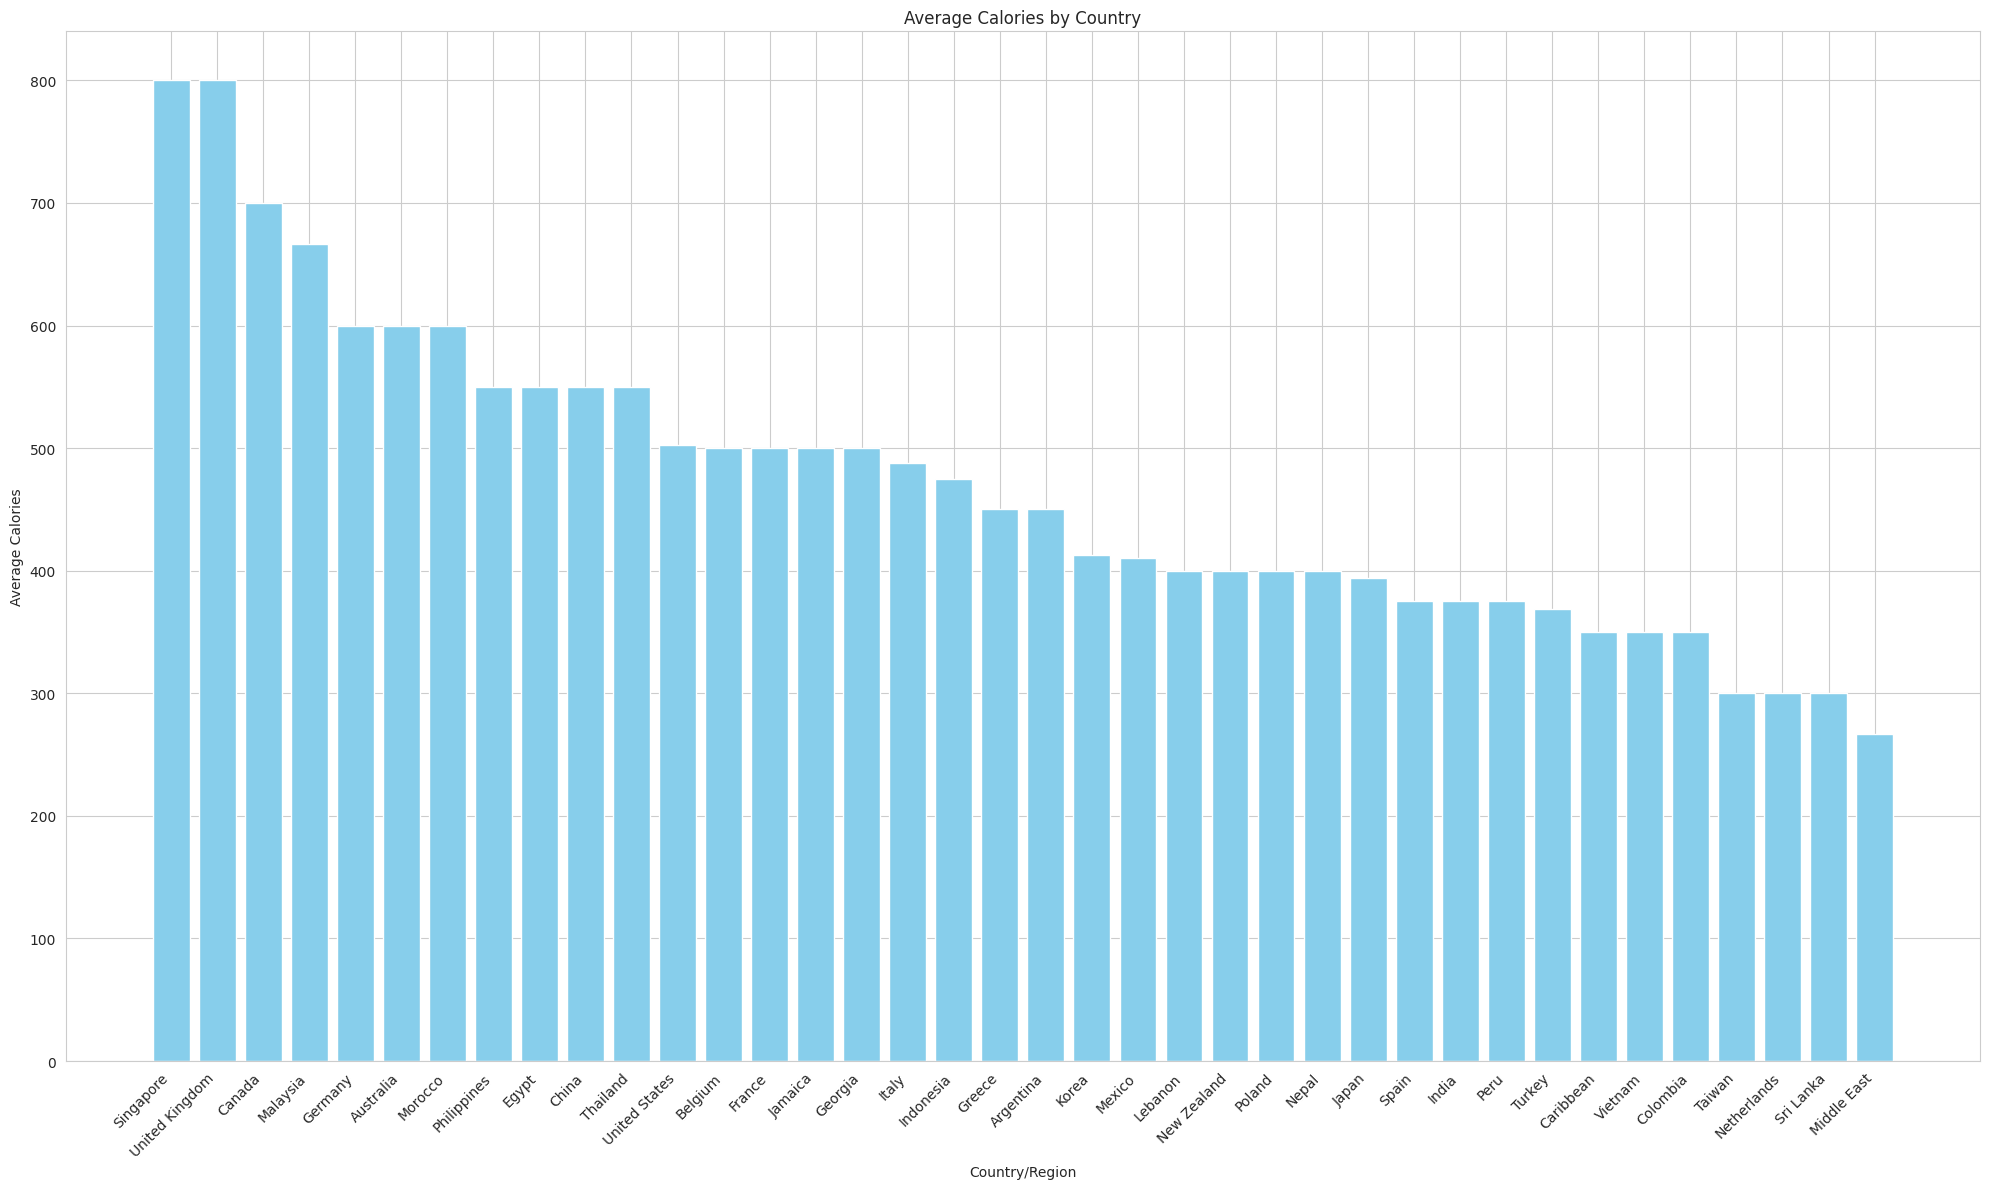

In [17]:
grouped_stats_sorted = grouped_stats.sort_values('Calories', ascending=False)

plt.figure(figsize=(20, 12))
plt.bar(grouped_stats_sorted.index, grouped_stats_sorted['Calories'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country/Region')
plt.ylabel('Average Calories')
plt.title('Average Calories by Country')
plt.tight_layout()
plt.show()

average preparation time by Country/Region

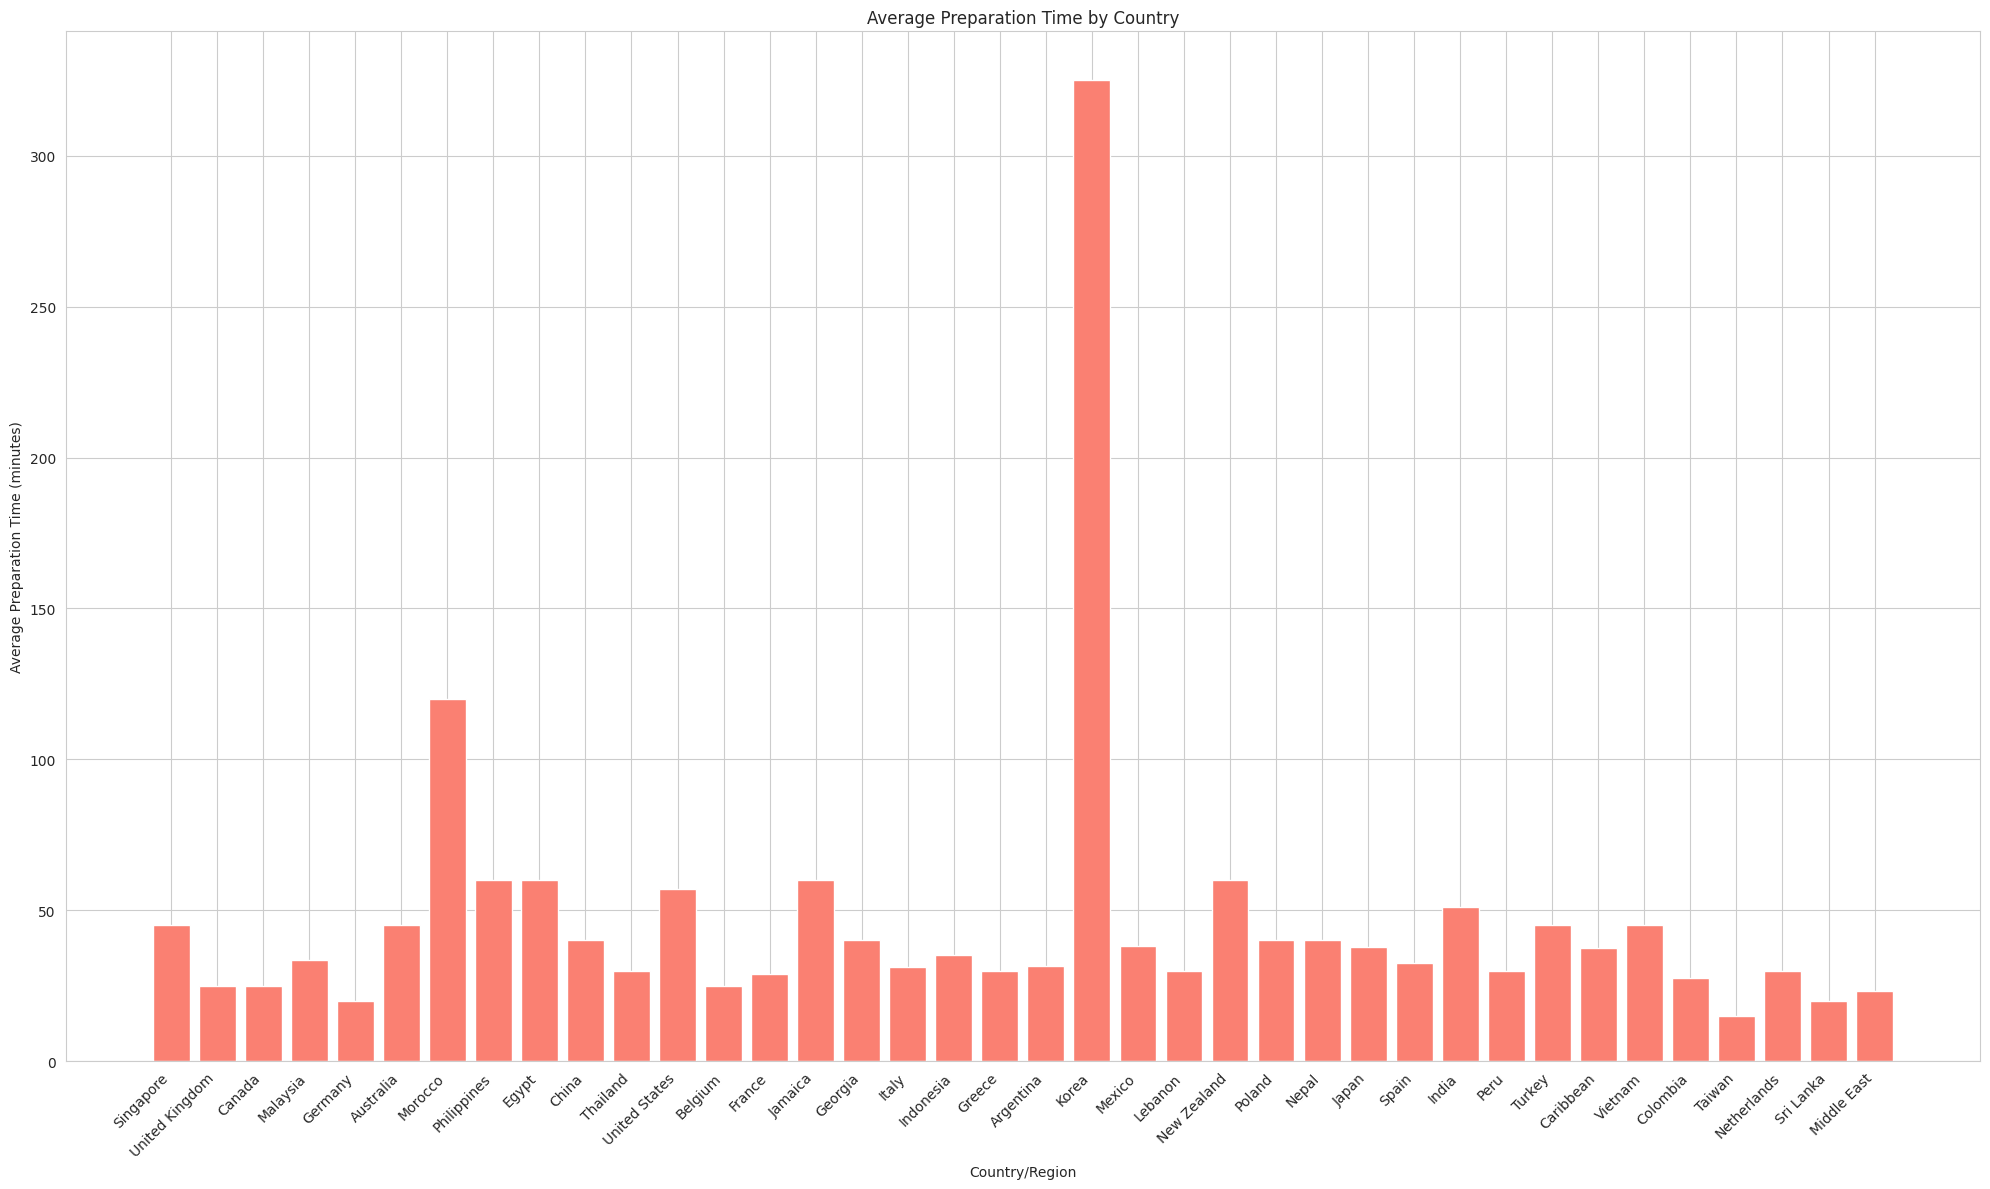

In [18]:
plt.figure(figsize=(20, 12))
plt.bar(grouped_stats_sorted.index, grouped_stats_sorted['Preparation Time'], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country/Region')
plt.ylabel('Average Preparation Time (minutes)')
plt.title('Average Preparation Time by Country')
plt.tight_layout()
plt.show()

food category distribution by Country/Region

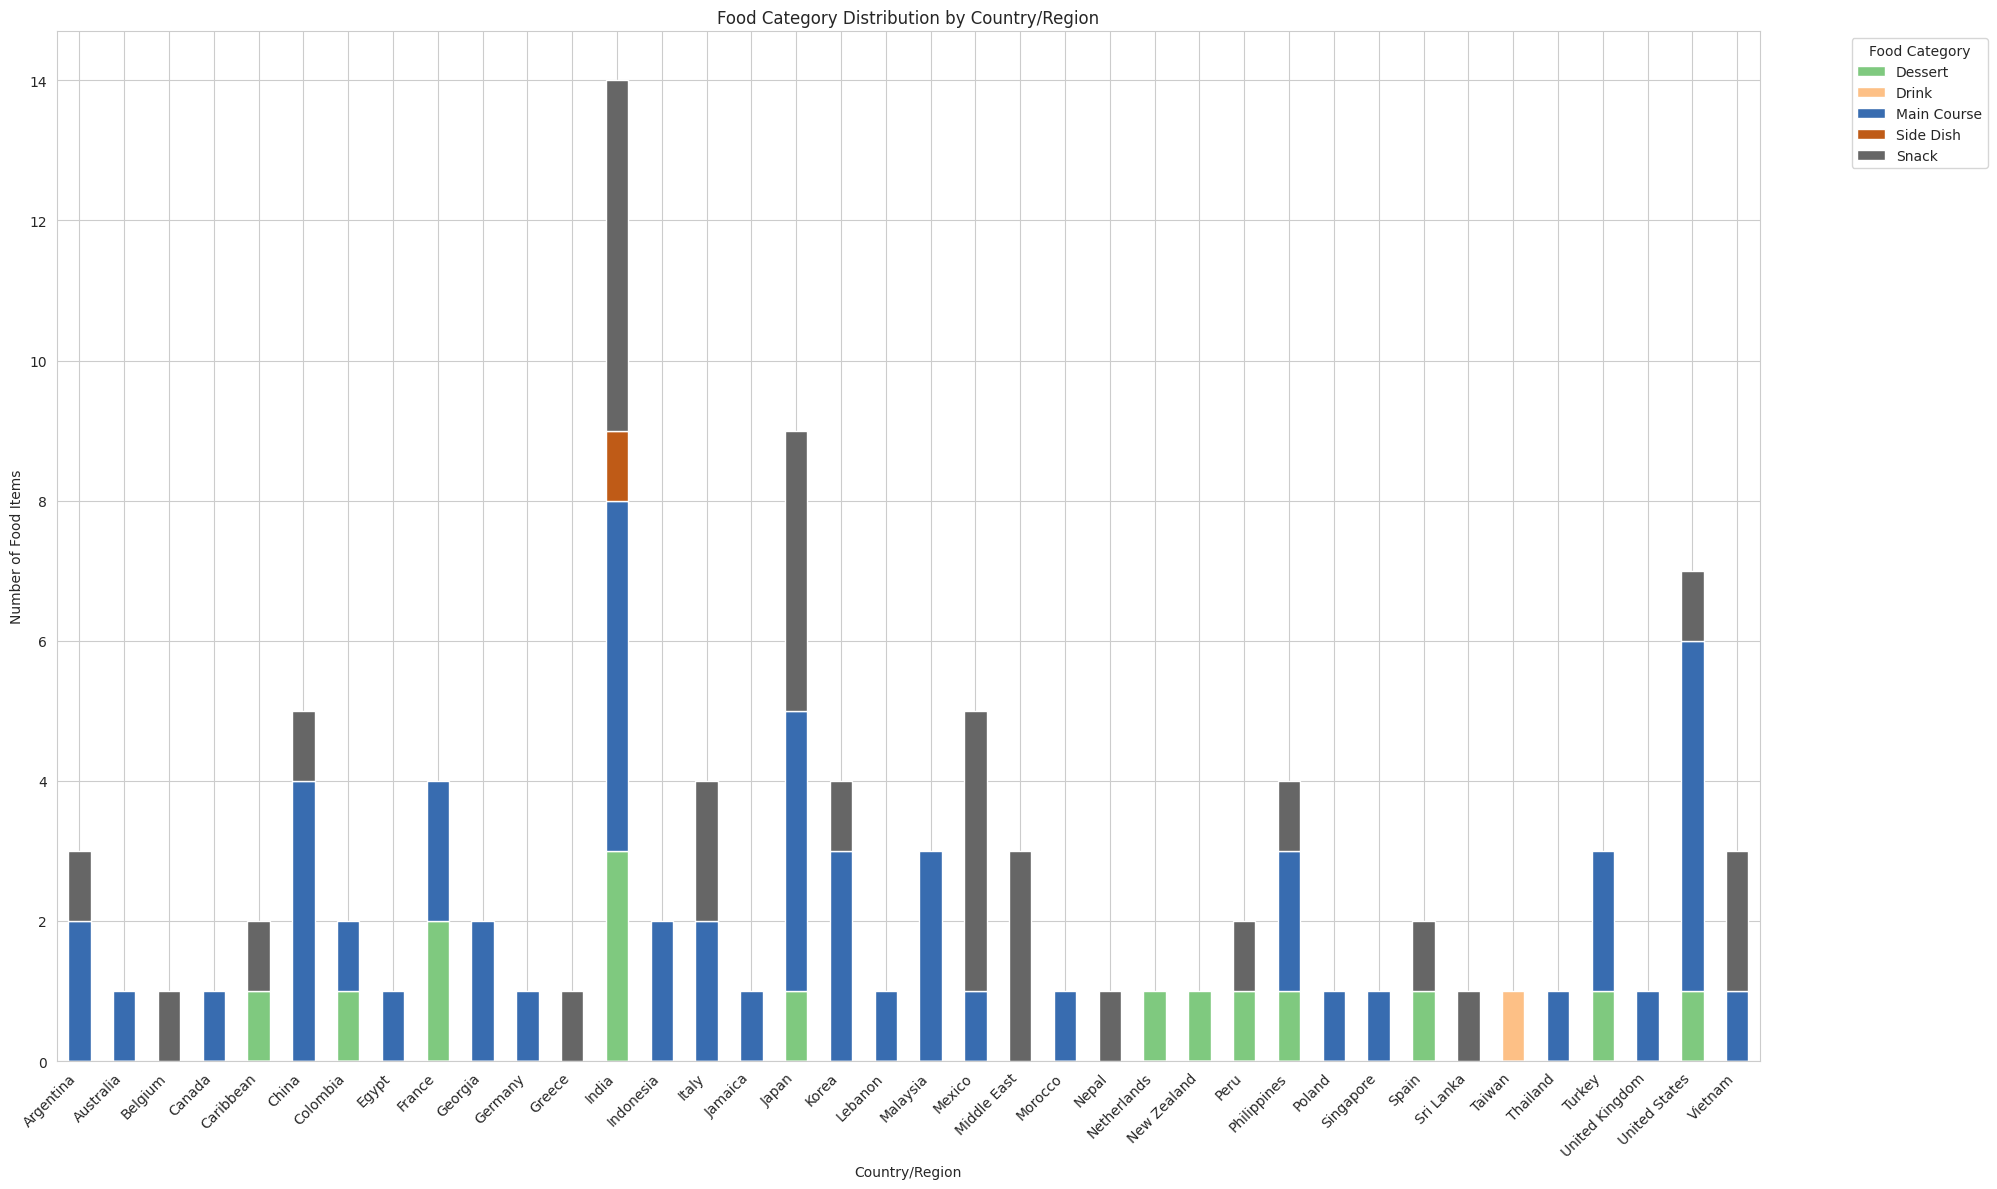

In [19]:
# plot settings

crosstab_category.plot(kind='bar', stacked=True, figsize=(20, 12), colormap='Accent')

# chart labels

plt.title('Food Category Distribution by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Number of Food Items')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Food Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

calories vs popularity

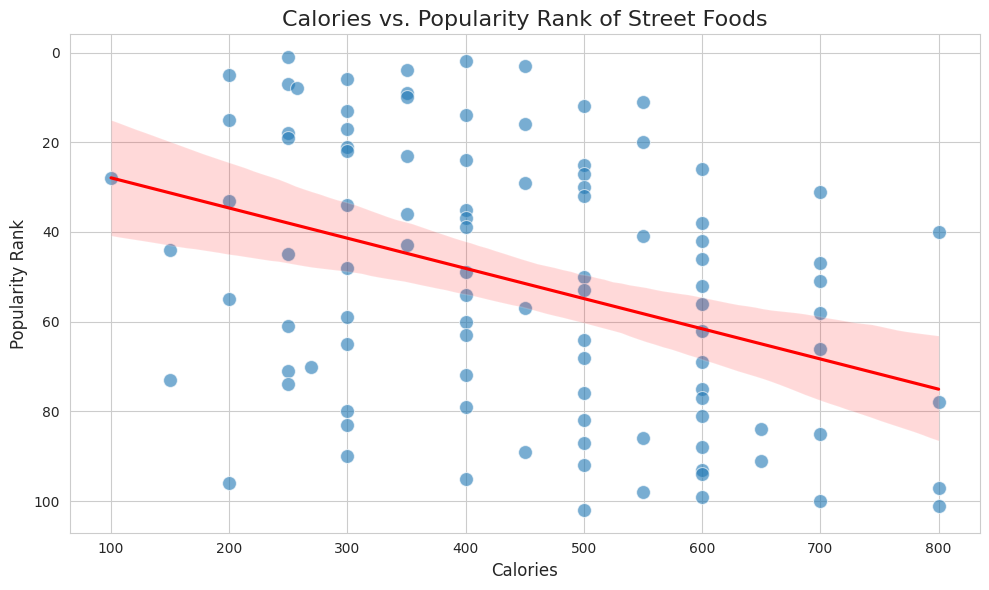

In [20]:
# create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_food, x='Calories', y='Popularity Rank', alpha=0.6, s=100)

# add a regression line to better visualize the trend
sns.regplot(data=df_food, x='Calories', y='Popularity Rank', scatter=False, color='red')

# set title and labels
plt.title('Calories vs. Popularity Rank of Street Foods', fontsize=16)
plt.xlabel('Calories', fontsize=12)
plt.ylabel('Popularity Rank', fontsize=12)
plt.grid(True)

# invert the y-axis so that Rank 1 is at the top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

distribution of calories using histogram

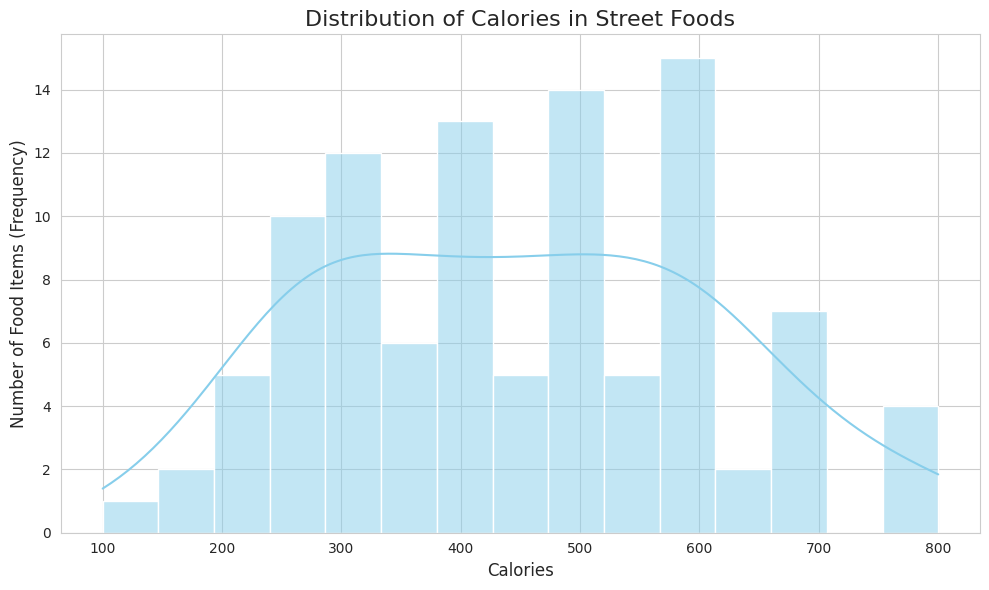

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df_food['Calories'], kde=True, bins=15, color='skyblue')

# set title and labels
plt.title('Distribution of Calories in Street Foods', fontsize=16)
plt.xlabel('Calories', fontsize=12)
plt.ylabel('Number of Food Items (Frequency)', fontsize=12)
plt.grid(True)

plt.tight_layout()

#Hypothesis Test

 the mean preparation time of the street foods is 30 minutes.

In [22]:
preparation_time_mean = df_food.groupby('Country/Region')['Preparation Time'].mean()

standard_deviation = df_food['Preparation Time'].std()

n = df_food.groupby('Country/Region')['Preparation Time'].count()

significance_level = 0.05  # 5%
confidence_level = 1 - significance_level
z_critical = 1.96  # for 95% confidence, two-tailed

# null hypothesis value
mu = 30  # claimed mean

# calculate z-scores for each country
zc = (preparation_time_mean - mu) / (standard_deviation / np.sqrt(n))

# display results
print("Hypothesis Test Results for Each Country:")
print(f"Null Hypothesis: The mean preparation time is {mu} minutes.")
print(f"Significance Level (alpha): {significance_level}")
print(f"Z-critical value (two-tailed): ±{z_critical}")
print("-" * 60)

for country, z_score in zc.items():
    if abs(z_score) > z_critical:
        decision = "Reject Null Hypothesis"
    else:
        decision = "Fail to Reject Null Hypothesis"

    print(f"Country: {country:<20} | Z-score: {z_score:6.2f} | Decision: {decision}")

Hypothesis Test Results for Each Country:
Null Hypothesis: The mean preparation time is 30 minutes.
Significance Level (alpha): 0.05
Z-critical value (two-tailed): ±1.96
------------------------------------------------------------
Country: Argentina            | Z-score:   0.02 | Decision: Fail to Reject Null Hypothesis
Country: Australia            | Z-score:   0.13 | Decision: Fail to Reject Null Hypothesis
Country: Belgium              | Z-score:  -0.04 | Decision: Fail to Reject Null Hypothesis
Country: Canada               | Z-score:  -0.04 | Decision: Fail to Reject Null Hypothesis
Country: Caribbean            | Z-score:   0.09 | Decision: Fail to Reject Null Hypothesis
Country: China                | Z-score:   0.19 | Decision: Fail to Reject Null Hypothesis
Country: Colombia             | Z-score:  -0.03 | Decision: Fail to Reject Null Hypothesis
Country: Egypt                | Z-score:   0.25 | Decision: Fail to Reject Null Hypothesis
Country: France               | Z-score: 